# H&M 고객 데이터

In [2]:
# 공통 셋업
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"  # Mac은 AppleGothic 권장
plt.rcParams["axes.unicode_minus"] = False
%matplotlib inline

# 데이터 로드
hm_path = "customer_hm.csv"
hm = pd.read_csv(hm_path)
hm.head()


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0,0,ACTIVE,NONE,49
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0,0,ACTIVE,NONE,25
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0,0,ACTIVE,NONE,24
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0,0,ACTIVE,NONE,54
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1,1,ACTIVE,Regularly,52


### 문제 1
**해설**  
멤버 상태의 등장 횟수를 세어(빈도), 많은 순서대로 정렬한 뒤 막대그래프로 그리면 비교가 쉽습니다.

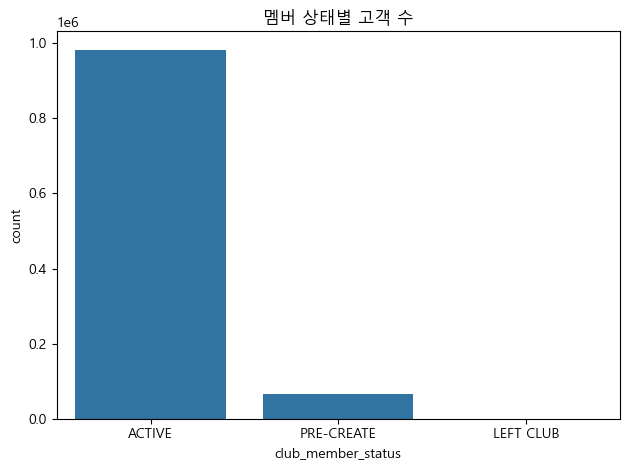

In [3]:
counts = hm['club_member_status'].value_counts()
order = counts.index
sns.countplot(data=hm, x='club_member_status', order=order)
plt.title('멤버 상태별 고객 수')
plt.xlabel('club_member_status'); plt.ylabel('count')
plt.tight_layout(); plt.show()

### 문제 2
**해설**  
구독 빈도도 범주형이므로 같은 방식으로 빈도를 세고, 내림차순 정렬한 순서를 그대로 막대에 적용합니다.

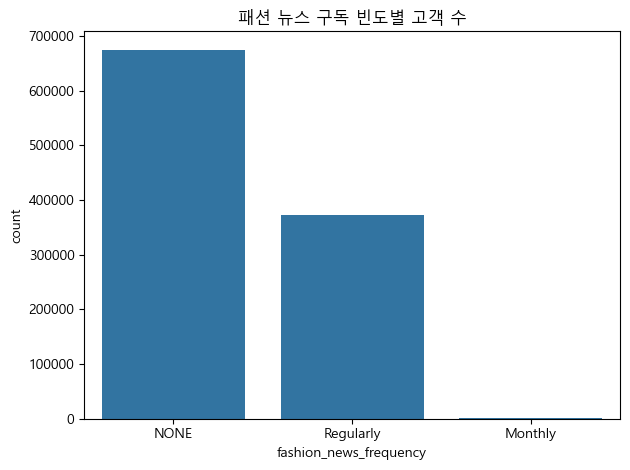

In [4]:
counts = hm['fashion_news_frequency'].value_counts()
order = counts.index
sns.countplot(data=hm, x='fashion_news_frequency', order=order)
plt.title('패션 뉴스 구독 빈도별 고객 수')
plt.xlabel('fashion_news_frequency'); plt.ylabel('count')
plt.tight_layout(); plt.show()

### 문제 3
**해설**  
나이는 연속형이므로 히스토그램이 적절합니다. 구간 수(bins)는 20 정도로 시작해 형태를 확인합니다.

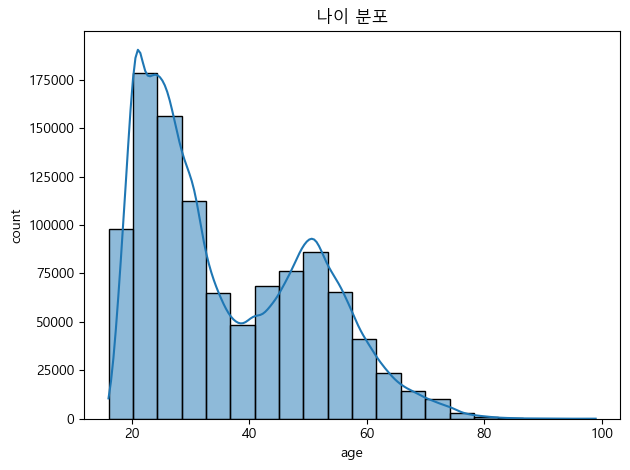

In [5]:
sns.histplot(data=hm, x='age', bins=20, kde=True)
plt.title('나이 분포')
plt.xlabel('age'); plt.ylabel('count')
plt.tight_layout(); plt.show()

### 문제 4
**해설**  
조건(Active=1)으로 행을 선택한 뒤, 같은 방식으로 나이 히스토그램을 그립니다. 표본 수는 `len()`으로 빠르게 확인할 수 있습니다.

표본 수: 362946


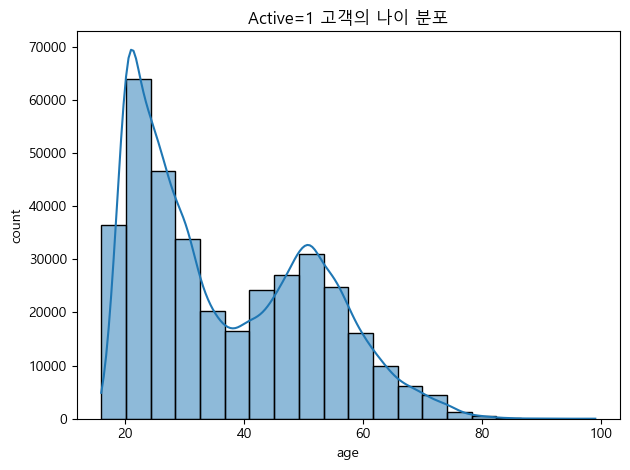

In [6]:
hm_active = hm[hm['Active'] == 1].dropna(subset=['age'])
print('표본 수:', len(hm_active))
sns.histplot(data=hm_active, x='age', bins=20, kde=True)
plt.title('Active=1 고객의 나이 분포')
plt.xlabel('age'); plt.ylabel('count')
plt.tight_layout(); plt.show()

### 문제 5
**해설**  
범주×수치의 분포 비교에는 박스플롯이 적합합니다. 나이의 결측치는 제외하고 그립니다.

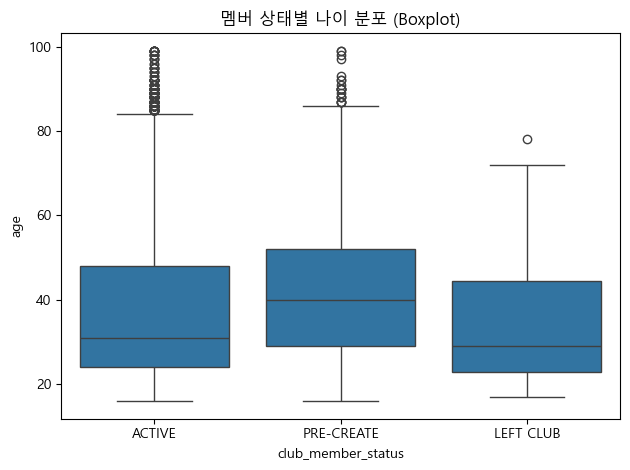

In [7]:
hm_age = hm.dropna(subset=['age'])
sns.boxplot(data=hm_age, x='club_member_status', y='age')
plt.title('멤버 상태별 나이 분포 (Boxplot)')
plt.xlabel('club_member_status'); plt.ylabel('age')
plt.tight_layout(); plt.show()

### 문제 6
**해설**  
그룹(멤버 상태)마다 평균 나이를 구한 뒤, 큰 값부터 정렬하여 막대그래프로 보여줍니다.

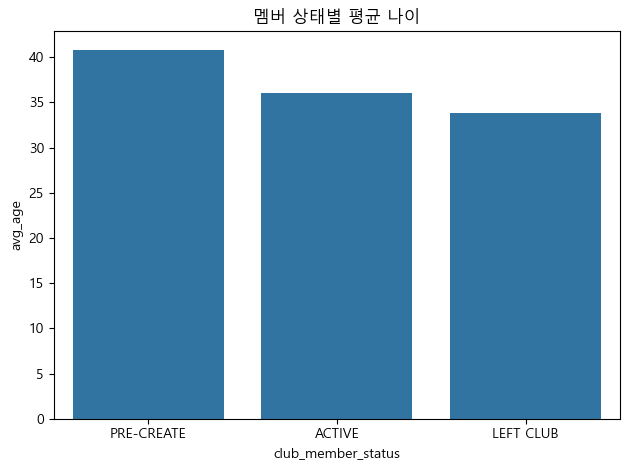

In [8]:
avg_age = (hm.dropna(subset=['age'])
              .groupby('club_member_status')['age']
              .mean()
              .reset_index(name='avg_age'))
order = avg_age.sort_values('avg_age', ascending=False)['club_member_status']
sns.barplot(data=avg_age, x='club_member_status', y='avg_age', order=order, errorbar=None)
plt.title('멤버 상태별 평균 나이')
plt.xlabel('club_member_status'); plt.ylabel('avg_age')
plt.tight_layout(); plt.show()

### 문제 7
**해설**  
Active는 0/1이므로 평균이 곧 비율입니다. 그룹별 평균을 구해 y축을 [0,1]로 맞추면 해석이 쉬워집니다.

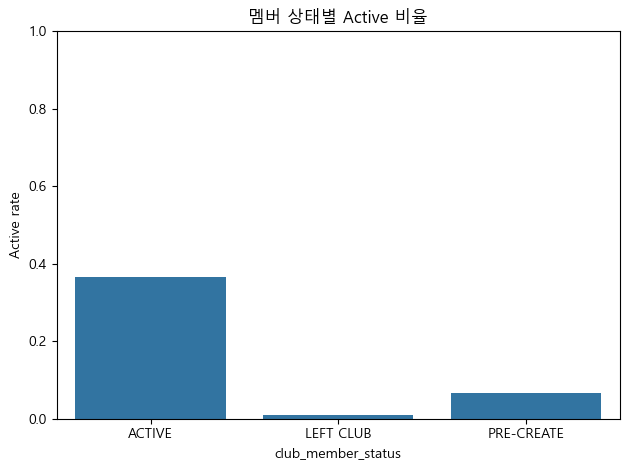

In [9]:
rate = (hm.groupby('club_member_status')['Active']
           .mean()
           .reset_index(name='active_rate'))
sns.barplot(data=rate, x='club_member_status', y='active_rate', errorbar=None)
plt.ylim(0,1)
plt.title('멤버 상태별 Active 비율')
plt.xlabel('club_member_status'); plt.ylabel('Active rate')
plt.tight_layout(); plt.show()

### 문제 8
**해설**  
패션 뉴스 구독 빈도와 Active의 관계도 같은 방식으로 비율 막대그래프로 비교할 수 있습니다.

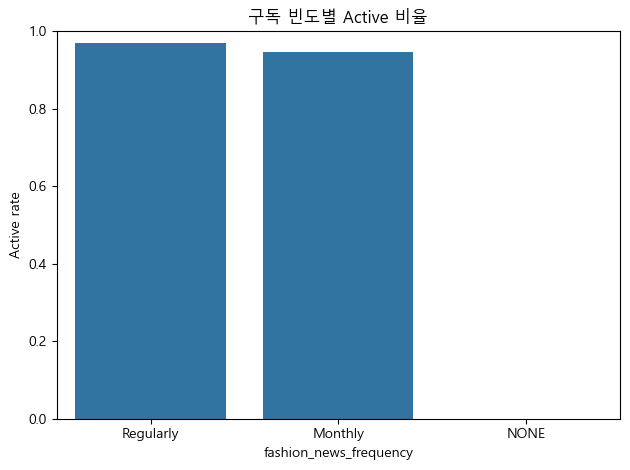

In [10]:
rate2 = (hm.groupby('fashion_news_frequency')['Active']
            .mean()
            .reset_index(name='active_rate'))
order = rate2.sort_values('active_rate', ascending=False)['fashion_news_frequency']
sns.barplot(data=rate2, x='fashion_news_frequency', y='active_rate', order=order, errorbar=None)
plt.ylim(0,1)
plt.title('구독 빈도별 Active 비율')
plt.xlabel('fashion_news_frequency'); plt.ylabel('Active rate')
plt.tight_layout(); plt.show()

### 문제 9
**해설**  
범주(구독 빈도)별 연속형(나이) 분포 비교에는 바이올린 플롯이 좋습니다. 중앙값과 사분위선을 함께 표시하면 분포 차이를 쉽게 읽을 수 있습니다.

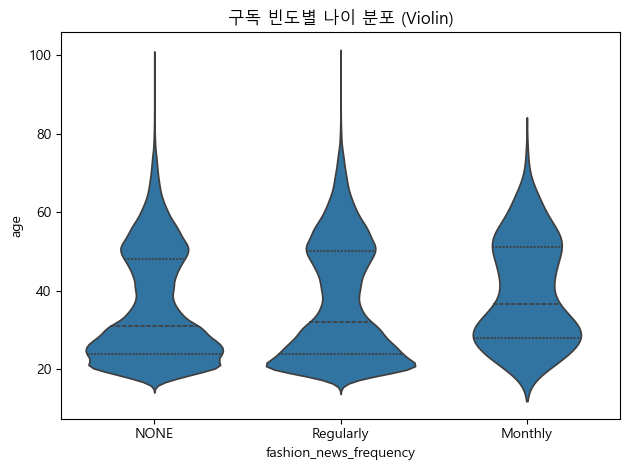

In [11]:
hm_age = hm.dropna(subset=['age'])
sns.violinplot(data=hm_age, x='fashion_news_frequency', y='age', inner='quartile')
plt.title('구독 빈도별 나이 분포 (Violin)')
plt.xlabel('fashion_news_frequency'); plt.ylabel('age')
plt.tight_layout(); plt.show()

### 문제 10
**해설**  
두 수치형(나이, FN)의 관계를 산점도로 보고, 멤버 상태를 색상으로 구분하면 그룹 패턴을 함께 관찰할 수 있습니다.

C:\Users\tlsdy\AppData\Local\Temp\ipykernel_42504\2079540310.py:5: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(); plt.show()
c:\Users\tlsdy\anaconda3\envs\data6\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


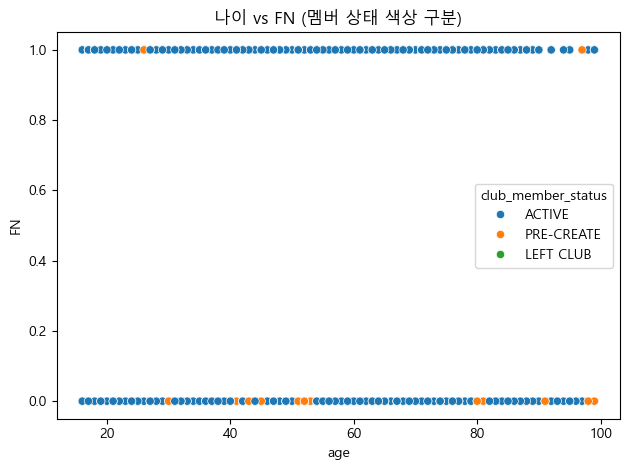

In [12]:
tmp = hm.dropna(subset=['age'])
sns.scatterplot(data=tmp, x='age', y='FN', hue='club_member_status')
plt.title('나이 vs FN (멤버 상태 색상 구분)')
plt.xlabel('age'); plt.ylabel('FN')
plt.tight_layout(); plt.show()

### 문제 11
**해설**  
두 범주형(멤버 상태 × 구독 빈도)의 관계는 교차표를 **행 기준 비율**로 변환한 뒤 히트맵으로 표현하면 한눈에 비교할 수 있습니다.

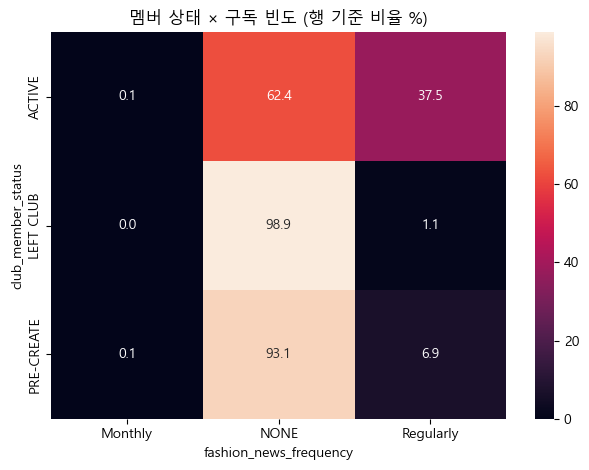

In [13]:
ct = pd.crosstab(hm['club_member_status'], hm['fashion_news_frequency'], normalize='index')*100
sns.heatmap(ct, annot=True, fmt='.1f')
plt.title('멤버 상태 × 구독 빈도 (행 기준 비율 %)')
plt.xlabel('fashion_news_frequency'); plt.ylabel('club_member_status')
plt.tight_layout(); plt.show()

### 문제 12
**해설**  
한 화면에서 범주별 분포를 비교하려면 패싯이 편리합니다. 같은 축 범위를 공유하면 패널 간 비교가 쉬워집니다.  
Monthly 는 약 700건 밖에 없기에 다른 범주에 비해 매우 적다. -> 표시가 거의 안남

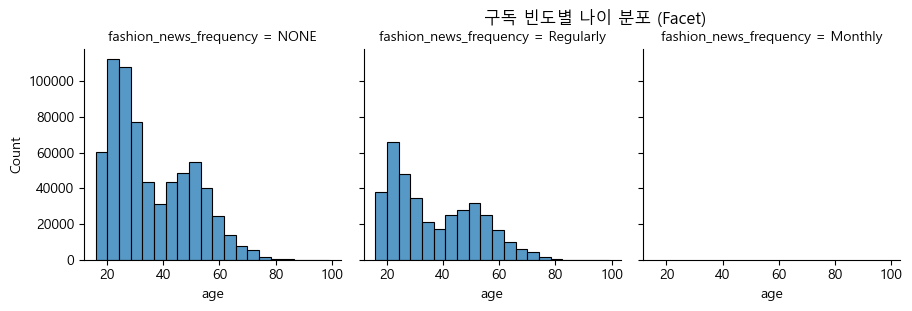

In [ ]:
hm_age = hm.dropna(subset=['age'])
g = sns.FacetGrid(hm_age, col='fashion_news_frequency', col_wrap=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x='age', bins=20)
g.fig.suptitle('구독 빈도별 나이 분포 (Facet)', y=1.02)
plt.show()

해설  
Monthly를 보고 싶다면 패널마다 y축 독립을 수행하면 된다. sharey=False 옵션!

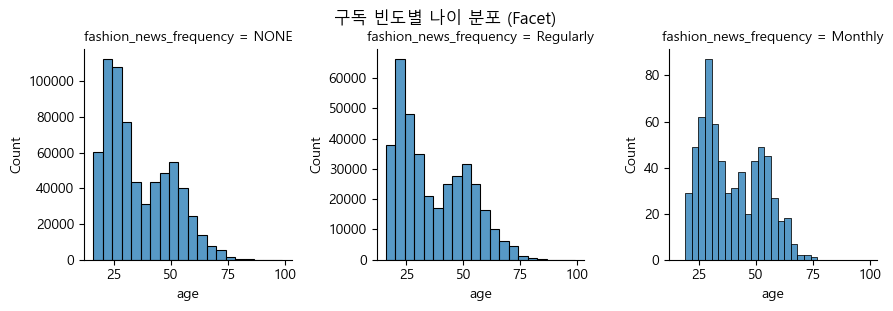

In [19]:
hm_age = hm.dropna(subset=['age'])
g = sns.FacetGrid(hm_age, col='fashion_news_frequency', col_wrap=3,
                  sharex=True, sharey=False)   # ← 핵심
g.map_dataframe(sns.histplot, x='age', bins=20)
g.fig.suptitle('구독 빈도별 나이 분포 (Facet)', y=1.02)
plt.show()

### 문제 13
**해설**  
수치형 변수들 간의 전체 관계를 요약해서 보려면 상관 히트맵이 적합합니다. 값까지 표기하면 강한 양/음의 쌍을 빠르게 찾을 수 있습니다.

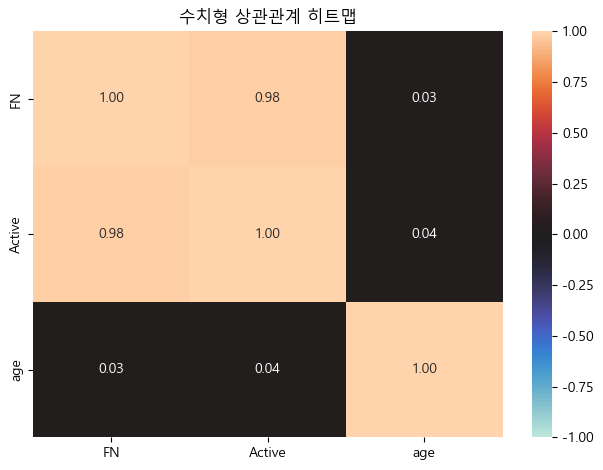

In [16]:
num = hm.select_dtypes(include='number')
# 수치형 열이 1개라면 굳이 상관 히트맵을 볼 필요가 없다
if num.shape[1] >= 2:
    corr = num.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, center=0)
    plt.title('수치형 상관관계 히트맵')
    plt.tight_layout(); plt.show()
else:
    print('수치형 열이 2개 미만입니다.')